# MODEL PROJECT

Imports and set magics:

In [43]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# imports

import numpy as np
import matplotlib.pyplot as plt

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

We will use a model for labor supply and growth. The equations in the model represent a closed economy described by a model with capital, labor supply, and a productive externality from capital.

\begin{equation}
Y_t = K_t^{\alpha}(A_t L_t)^{1-\alpha}, \;\; 0 <\alpha < 1
\tag{1}
\end{equation}

\begin{equation}
K_{t+1} = sY_t + (1-\delta)K_t, \;\; 0 < s < 1, \;\; 0 < \delta < 1, \;\; K_0 > 0
\tag{2}
\end{equation}

\begin{equation}
L_t = \lambda N_t, \;\; 0 < \lambda \leq 1
\tag{3}
\end{equation}

\begin{equation}
N_{t+1} = (1+n)N_t, \;\; N_0 > 0
\tag{4}
\end{equation}

\begin{equation}
A_t = K_t^{\phi}, \;\; 0 < \phi \leq 1
\tag{5}
\end{equation}

The profit maximization problem of the representative firm is:

$$
\max_{K_t,L_t} \pi = K_t^\alpha (A_tL_t)^{1-\alpha} - r_tK_t - w_tL_t
$$

The real wage and the real interest rate are:

$$
r_t = \alpha k_t^{\alpha-1} (A_t \lambda)^{1-\alpha}, \;\;\; k_t = \frac{K_t}{N_t}
$$

$$
w_t = (1-\alpha) \left(\frac{k_t}{\lambda}\right)^{\alpha} A_t^{1-\alpha}
$$

We would like to examine the economy in two different scenarios. The first scenario is an economy with a constant employment rate (i.e. $\lambda = 1$) from period $t = 0$ to $t = 30$. The second scenario is an economy where the employment rate is reduced to $\lambda = 0.8$ from period $t = 1$ to $t = 10$, after which it is increased to the original level, $\lambda = 1$ (i.e. $\lambda = 1$ in $11 \leq t \leq 30$).

Furthermore, we seek to visualize different variables in the different scenarios from the periode $t = 0$ to $t = 30$ such as GDP per capita, real wages, real interest rates and also the deviation in GDP per capita caused by the reduced employment rate.

## Analysis

Our code is in our python file 'modelproject.py'. We import the different functions etc. and plot our results.

/var/folders/s3/w97pmck54yv9tf6h97rkhxz80000gn/T/ipykernel_23712/2986645611.py:15: RuntimeWarning: invalid value encountered in divide
  percentage_deviation = ((gdp_varying - gdp_constant) / gdp_constant) * 100


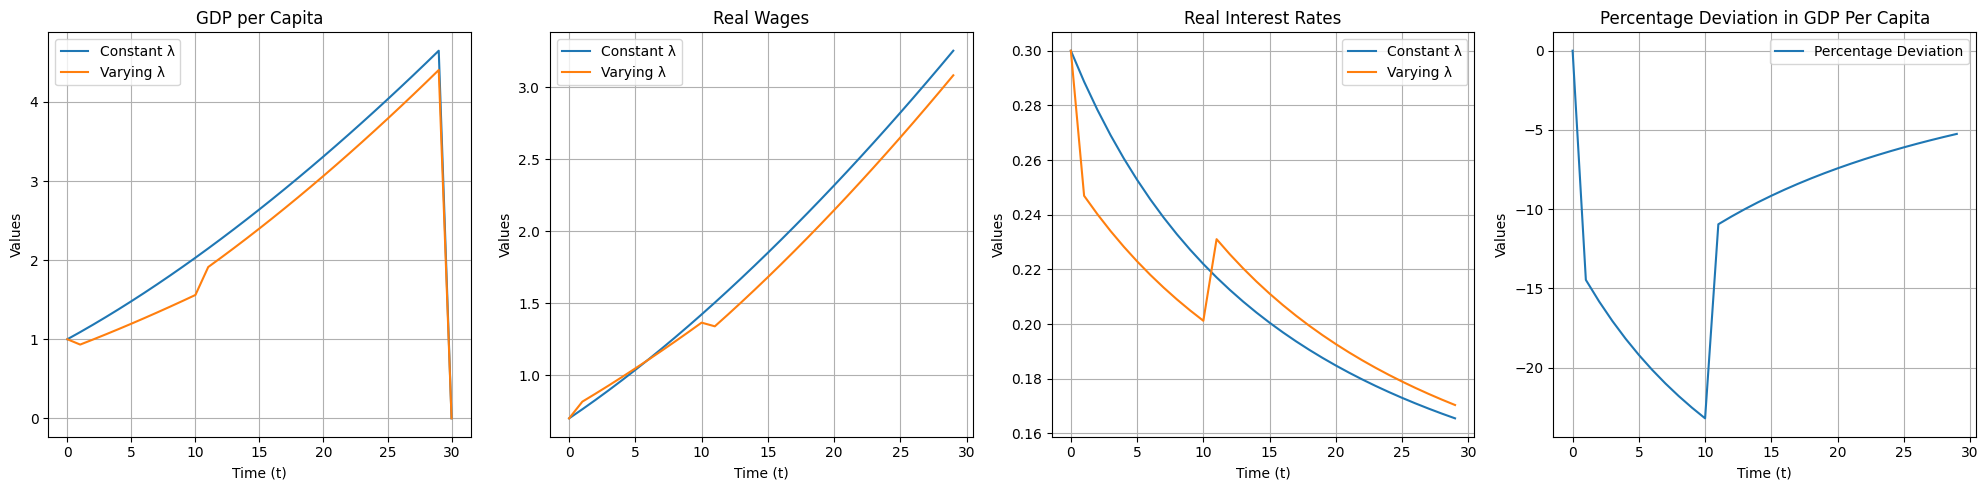

In [44]:
from modelproject import default_parameters, economy_simulation, plot

par = default_parameters()
T = 30
lambda_changes = np.ones(T)
lambda_changes[1:11] = 0.8  # Reduced employment rate from period 1 to 11

# Simulation with constant lambda
gdp_constant, wages_constant, interest_constant = economy_simulation(par, T)

# Simulation with varying lambda
gdp_varying, wages_varying, interest_varying = economy_simulation(par, T, lambda_changes)

# Calculation of the percentage deviation in GDP per capita
percentage_deviation = ((gdp_varying - gdp_constant) / gdp_constant) * 100

# Plotting the results
plot(gdp_constant, gdp_varying, wages_constant, wages_varying, interest_constant, interest_varying, percentage_deviation)




##### Figure 1: GDP per Capita
 The first figure (from the left) shows GDP per capita over time for both constant and varying labor participation rates ($\lambda$). Both trajectories increase over time, indicating economic growth. The plot with varying $\lambda$ starts lower than the constant $\lambda$ from period 0 to 10, which is a result of the initial adjustments in $\lambda$ that dampen economic output. After time 10, GDP per capita recovers and nearly aligns with the constant $\lambda$ trajectory, yet it stays at a lower level, indicating that despite recovery, the early deficit in economic output isn't fully regained.

##### Figure 2: Real Wages
This graph compares the effects of constant and varying $\lambda$ on real wages over time. The plot shows that wages increase under both scenarios but with the varying $\lambda$ ending slightly lower. The convergence and divergence in the wage paths could indicate that changes in $\lambda$ affect productivity or labor demand differently over time. In periods of higher $\lambda$ variability, wages might not increase as quickly due to uncertainties or slower growth in productivity, affecting the purchasing power and living standards of the population.

##### Figure 3: Real Interest Rates
The plot for real interest rates displays a declining trend for both constant and varying $\lambda$ scenarios. However, the rate of decline and the paths differ slightly, with the varying $\lambda$ scenario showing more volatility and ending slightly higher compared to the constant scenario. The declining real interest rates suggests an increased supply of loanable funds, possibly from rising productivity and capital accumulation. The greater volatility in the varying $\lambda$ scenario reflects the economic adjustments to changing labor inputs, affecting the demand for capital and influencing interest rates.

##### Figure 4: Percentage Deviation in GDP per Capita
The percentage deviation in GDP per capita shows significant fluctuations, with a sharp initial decline followed by recovery. This could be interpreted as the economy experiencing a shock (related to changes in $\lambda$) and then gradually stabilizing. The eventual recovery and diminishing negative deviation indicate that the economy is adapting to the new conditions and returning towards its potential output level, although it remains below its initial trajectory.


Now, we want to look at what happens if we change some of the parameters.

/var/folders/s3/w97pmck54yv9tf6h97rkhxz80000gn/T/ipykernel_23712/1820346801.py:9: RuntimeWarning: invalid value encountered in divide
  percentage_deviation_mod = ((gdp_varying_mod - gdp_constant_mod) / gdp_constant_mod) * 100


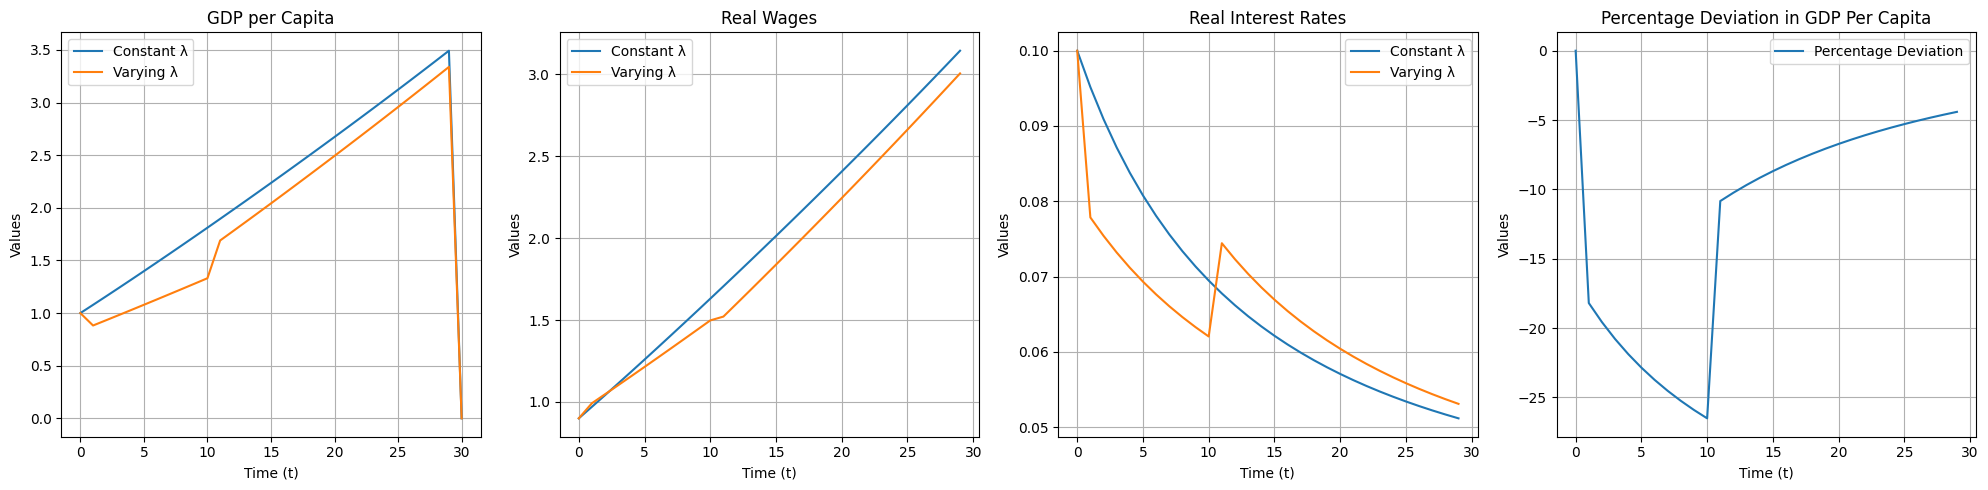

In [45]:
# Modify parameters for a specific scenario
par.alpha = 0.1  # Change elasticity of capital

# Run simulation with modified parameters
gdp_constant_mod, wages_constant_mod, interest_constant_mod = economy_simulation(par, T)
gdp_varying_mod, wages_varying_mod, interest_varying_mod = economy_simulation(par, T, lambda_changes)

# Calculate percentage deviation with modified parameters
percentage_deviation_mod = ((gdp_varying_mod - gdp_constant_mod) / gdp_constant_mod) * 100

# Plotting results with the modified parameters
plot(gdp_constant_mod, gdp_varying_mod, wages_constant_mod, wages_varying_mod, interest_constant_mod, interest_varying_mod, percentage_deviation_mod)


##### Scenario with $\alpha = 1$
From the figures, we see that the GDP per capita shows less growth than earlier, highlighting a diminished influence of capital on economic output and wages due to the decreased $\lambda$. The figure with real interest rates shows a more compressed y-axis with a starting point of 0.1 instead of 0.3 (which makes sense due to the change of $\alpha$ from 0.3 to 0.1).

Overall, the graphs display essentially identical trends as before, but with adjusted limits on the y-axis.

/var/folders/s3/w97pmck54yv9tf6h97rkhxz80000gn/T/ipykernel_23712/3656695773.py:10: RuntimeWarning: invalid value encountered in divide
  percentage_deviation_mod = ((gdp_varying_mod - gdp_constant_mod) / gdp_constant_mod) * 100


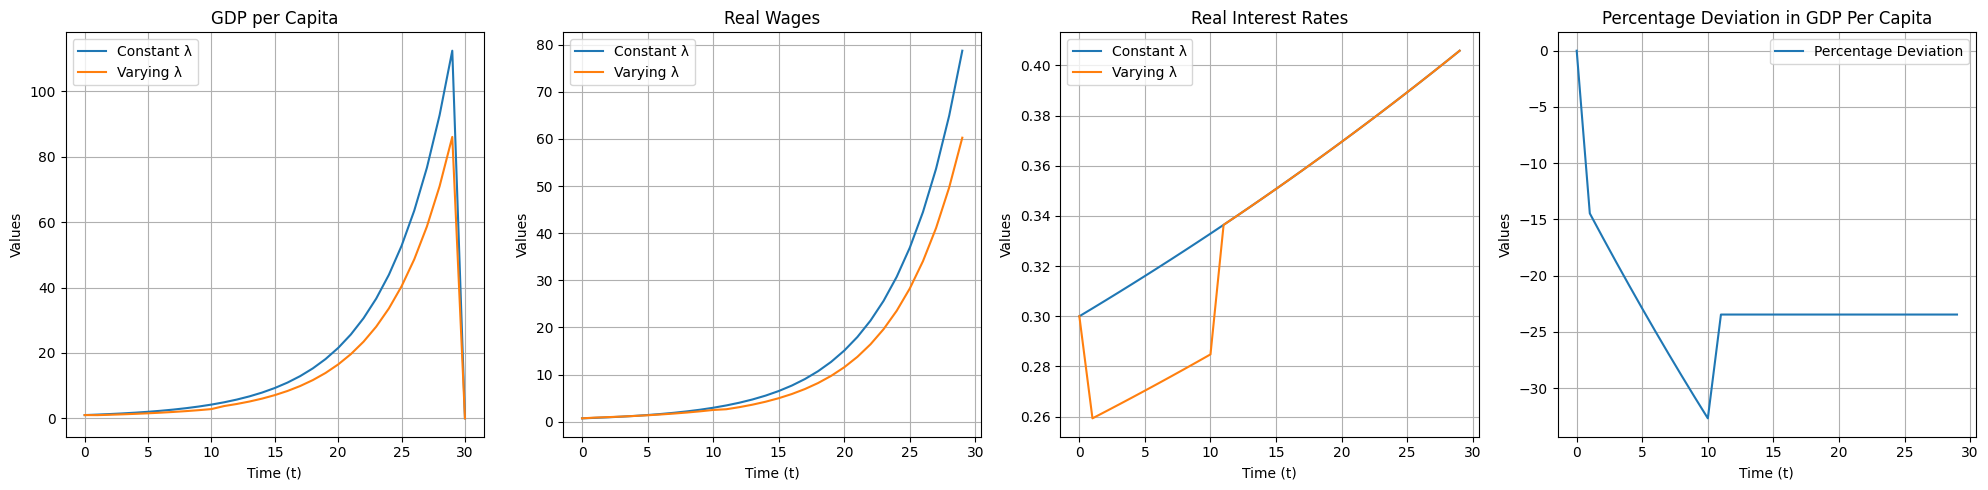

In [49]:
# Modify parameters for a specific scenario
par.alpha = 0.3
par.phi = 1

# Run simulation with modified parameters
gdp_constant_mod, wages_constant_mod, interest_constant_mod = economy_simulation(par, T)
gdp_varying_mod, wages_varying_mod, interest_varying_mod = economy_simulation(par, T, lambda_changes)

# Calculate percentage deviation with modified parameters
percentage_deviation_mod = ((gdp_varying_mod - gdp_constant_mod) / gdp_constant_mod) * 100

# Plotting results with the modified parameters
plot(gdp_constant_mod, gdp_varying_mod, wages_constant_mod, wages_varying_mod, interest_constant_mod, interest_varying_mod, percentage_deviation_mod)


##### Scenario with $\phi = 1$
In this extreme hypothetical example, the graphs in figure 1 and 3 both show exponential-like growth, with GDP per capita and real wages skyrocketing especially in the latter periods, indicative of the direct, proportionate influence of capital on technology ($A_t = K_t^\phi$) boosting output and wages dramatically.

The percentage deviation in GDP per capita starts with a sharp decrease and then levels off at a lower point. This could mean that initially, the economy is adjusting to the unexpectedly strong impact of capital on technology, resulting in significant long-term differences from previous growth patterns.

# Conclusion

In this project, we used a Python-based economic model to analyze how changes in key parameters ($\lambda$ and $\alpha$) impact indicators like GDP per capita and real wages. By adjusting $\lambda$, we demonstrated the model's sensitivity to labor market conditions, showing significant effects on economic outcomes. Lowering $\alpha$ maintained similar trends but resulted in lower peaks for GDP per capita and real wages, indicating reduced economic growth. We also explored extreme settings by setting $\phi = 1$, illustrating exponential growth due to capital's direct impact on technology.